# CSV NaN Values Analysis

This notebook provides a comprehensive analysis of missing (NaN) values in a CSV file.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the CSV file
# Replace 'your_file.csv' with the path to your actual CSV file
df = pd.read_csv('mcq_eval_llama3.3_70b.csv')

In [19]:
# Basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1510 non-null   object 
 1   mcq_json              1510 non-null   object 
 2   rubric                1225 non-null   object 
 3   question              1510 non-null   object 
 4   option_a              1510 non-null   object 
 5   option_b              1510 non-null   object 
 6   option_c              1510 non-null   object 
 7   option_d              1510 non-null   object 
 8   correct_option        1510 non-null   object 
 9   content_gpt           1510 non-null   object 
 10  originality           1510 non-null   float64
 11  readability           1510 non-null   float64
 12  starts_with_negation  1510 non-null   bool   
 13  is_question           1510 non-null   bool   
 14  relevance             1510 non-null   float64
 15  

In [20]:
# Analyze NaN values
def analyze_nan_values(dataframe):
    """
    Analyze NaN values in a DataFrame.
    
    Parameters:
    dataframe (pandas.DataFrame): Input dataframe
    
    Returns:
    pandas.DataFrame: A summary of NaN values for each column
    """
    # Calculate total number of rows
    total_rows = len(dataframe)
    
    # Create a summary dataframe of NaN values
    nan_summary = pd.DataFrame({
        'Total_Rows': total_rows,
        'NaN_Count': dataframe.isna().sum(),
        'NaN_Percentage': (dataframe.isna().sum() / total_rows * 100).round(2)
    })
    
    # Sort the summary by NaN percentage in descending order
    nan_summary = nan_summary.sort_values('NaN_Percentage', ascending=False)
    
    return nan_summary

# Perform NaN analysis
nan_analysis = analyze_nan_values(df)
print("NaN Values Analysis:")
print(nan_analysis)

NaN Values Analysis:
                      Total_Rows  NaN_Count  NaN_Percentage
rubric                      1510        285           18.87
id                          1510          0            0.00
originality                 1510          0            0.00
disclosure                  1510          0            0.00
gpt_answer                  1510          0            0.00
ambiguity                   1510          0            0.00
relevance                   1510          0            0.00
is_question                 1510          0            0.00
starts_with_negation        1510          0            0.00
readability                 1510          0            0.00
content_gpt                 1510          0            0.00
mcq_json                    1510          0            0.00
correct_option              1510          0            0.00
option_d                    1510          0            0.00
option_c                    1510          0            0.00
option_b           

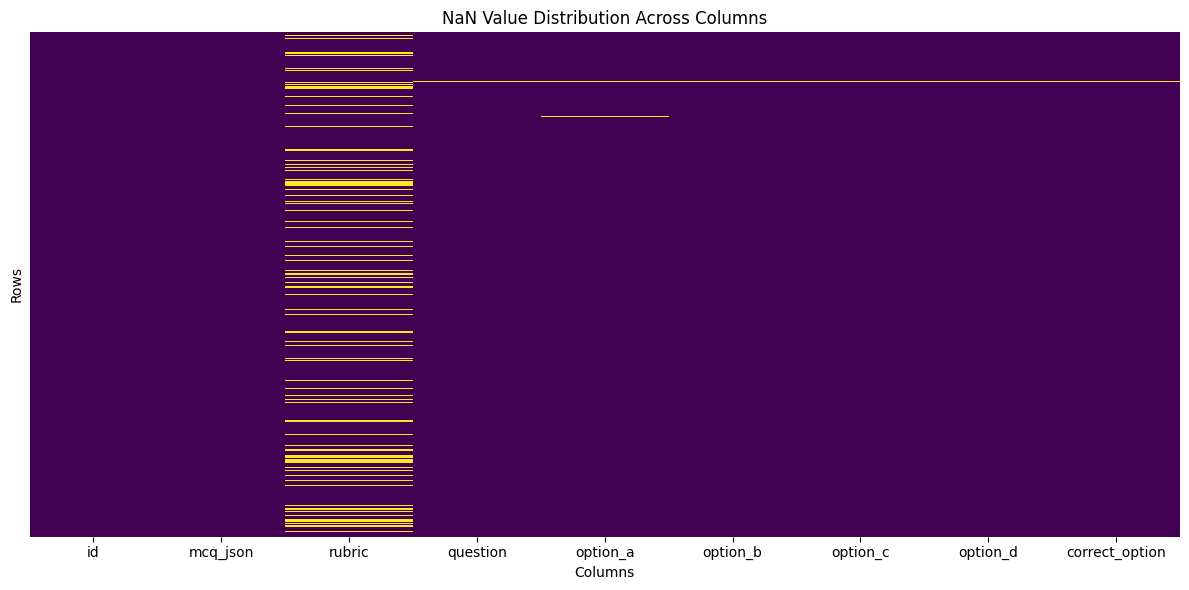

In [7]:
# Visualize NaN distribution
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('NaN Value Distribution Across Columns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()

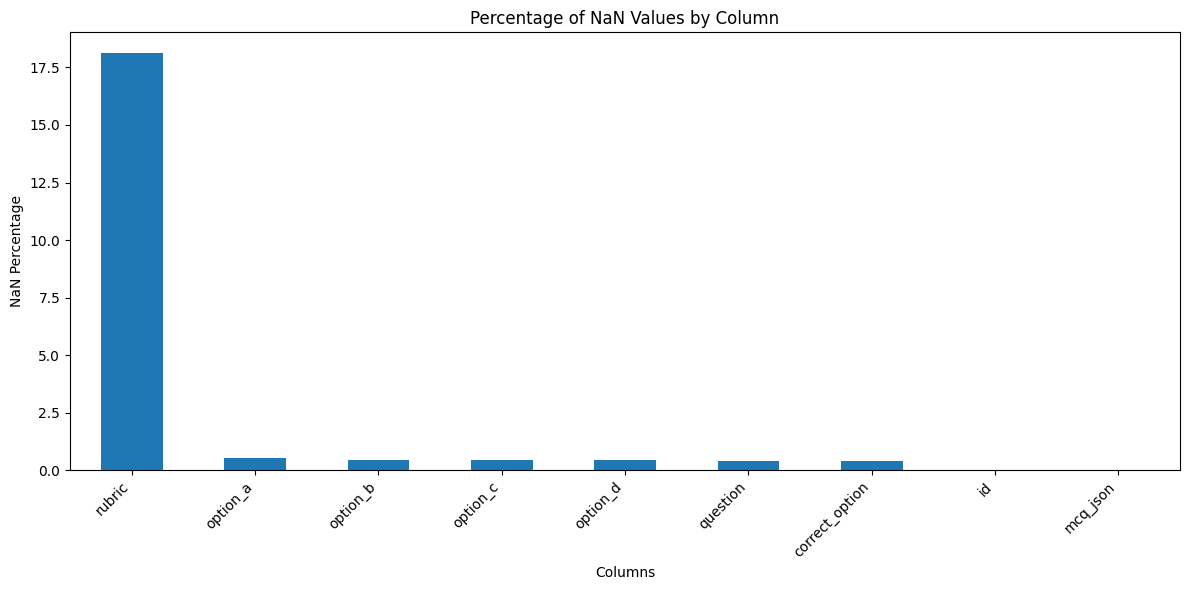

In [8]:
# Bar plot of NaN percentages
plt.figure(figsize=(12, 6))
nan_analysis['NaN_Percentage'].plot(kind='bar')
plt.title('Percentage of NaN Values by Column')
plt.xlabel('Columns')
plt.ylabel('NaN Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Data Cleaning Strategies
def clean_data(dataframe):
    """
    Demonstrate various ways to handle NaN values
    
    Parameters:
    dataframe (pandas.DataFrame): Input dataframe
    
    Returns:
    dict: Cleaned dataframes with different strategies
    """
    # 1. Drop rows with NaN values
    df_dropped = dataframe.dropna()
    
    # 2. Fill NaN with specific value (0 in this example)
    df_filled_value = dataframe.fillna(0)
    
    # 3. Fill numeric columns with mean
    df_filled_mean = dataframe.copy()
    numeric_columns = dataframe.select_dtypes(include=[np.number]).columns
    df_filled_mean[numeric_columns] = df_filled_mean[numeric_columns].fillna(df_filled_mean[numeric_columns].mean())
    
    # 4. Fill categorical columns with mode
    df_filled_mode = dataframe.copy()
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df_filled_mode[col] = df_filled_mode[col].fillna(df_filled_mode[col].mode()[0])
    
    return {
        'Dropped Rows': df_dropped,
        'Filled with 0': df_filled_value,
        'Filled with Mean (Numeric)': df_filled_mean,
        'Filled with Mode (Categorical)': df_filled_mode
    }

# Apply cleaning strategies
cleaned_dataframes = clean_data(df)

# Print NaN analysis for each cleaned dataframe
print("NaN Analysis After Different Cleaning Strategies:")
for strategy, cleaned_df in cleaned_dataframes.items():
    print(f"\n{strategy} Strategy:")
    print(analyze_nan_values(cleaned_df))

NaN Analysis After Different Cleaning Strategies:

Dropped Rows Strategy:
                Total_Rows  NaN_Count  NaN_Percentage
id                    1291          0             0.0
mcq_json              1291          0             0.0
rubric                1291          0             0.0
question              1291          0             0.0
option_a              1291          0             0.0
option_b              1291          0             0.0
option_c              1291          0             0.0
option_d              1291          0             0.0
correct_option        1291          0             0.0

Filled with 0 Strategy:
                Total_Rows  NaN_Count  NaN_Percentage
id                    1584          0             0.0
mcq_json              1584          0             0.0
rubric                1584          0             0.0
question              1584          0             0.0
option_a              1584          0             0.0
option_b              1584          0

## Insights and Recommendations

Based on the NaN analysis:
1. Identify columns with high percentages of missing values
2. Choose appropriate cleaning strategy based on data type and domain knowledge
3. Consider the impact of cleaning method on your analysis